In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Loan_default.csv")

In [3]:
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [5]:
# data.isna().mean()*100 returns the persentage of missing values
data.isnull().sum() * 100 

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [6]:
# Check for duplicate values
data.duplicated().sum()

np.int64(0)

In [7]:
# To drop irrelevant columns

In [8]:
# for dropping a column, axis is =1, for rows axis =0
data.drop(["LoanID"], axis=1, inplace=True)

In [9]:
data.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [10]:
# Check for outliers

In [11]:
numerical_data = data.select_dtypes(include=["number"])

In [12]:
len(numerical_data.columns)

10

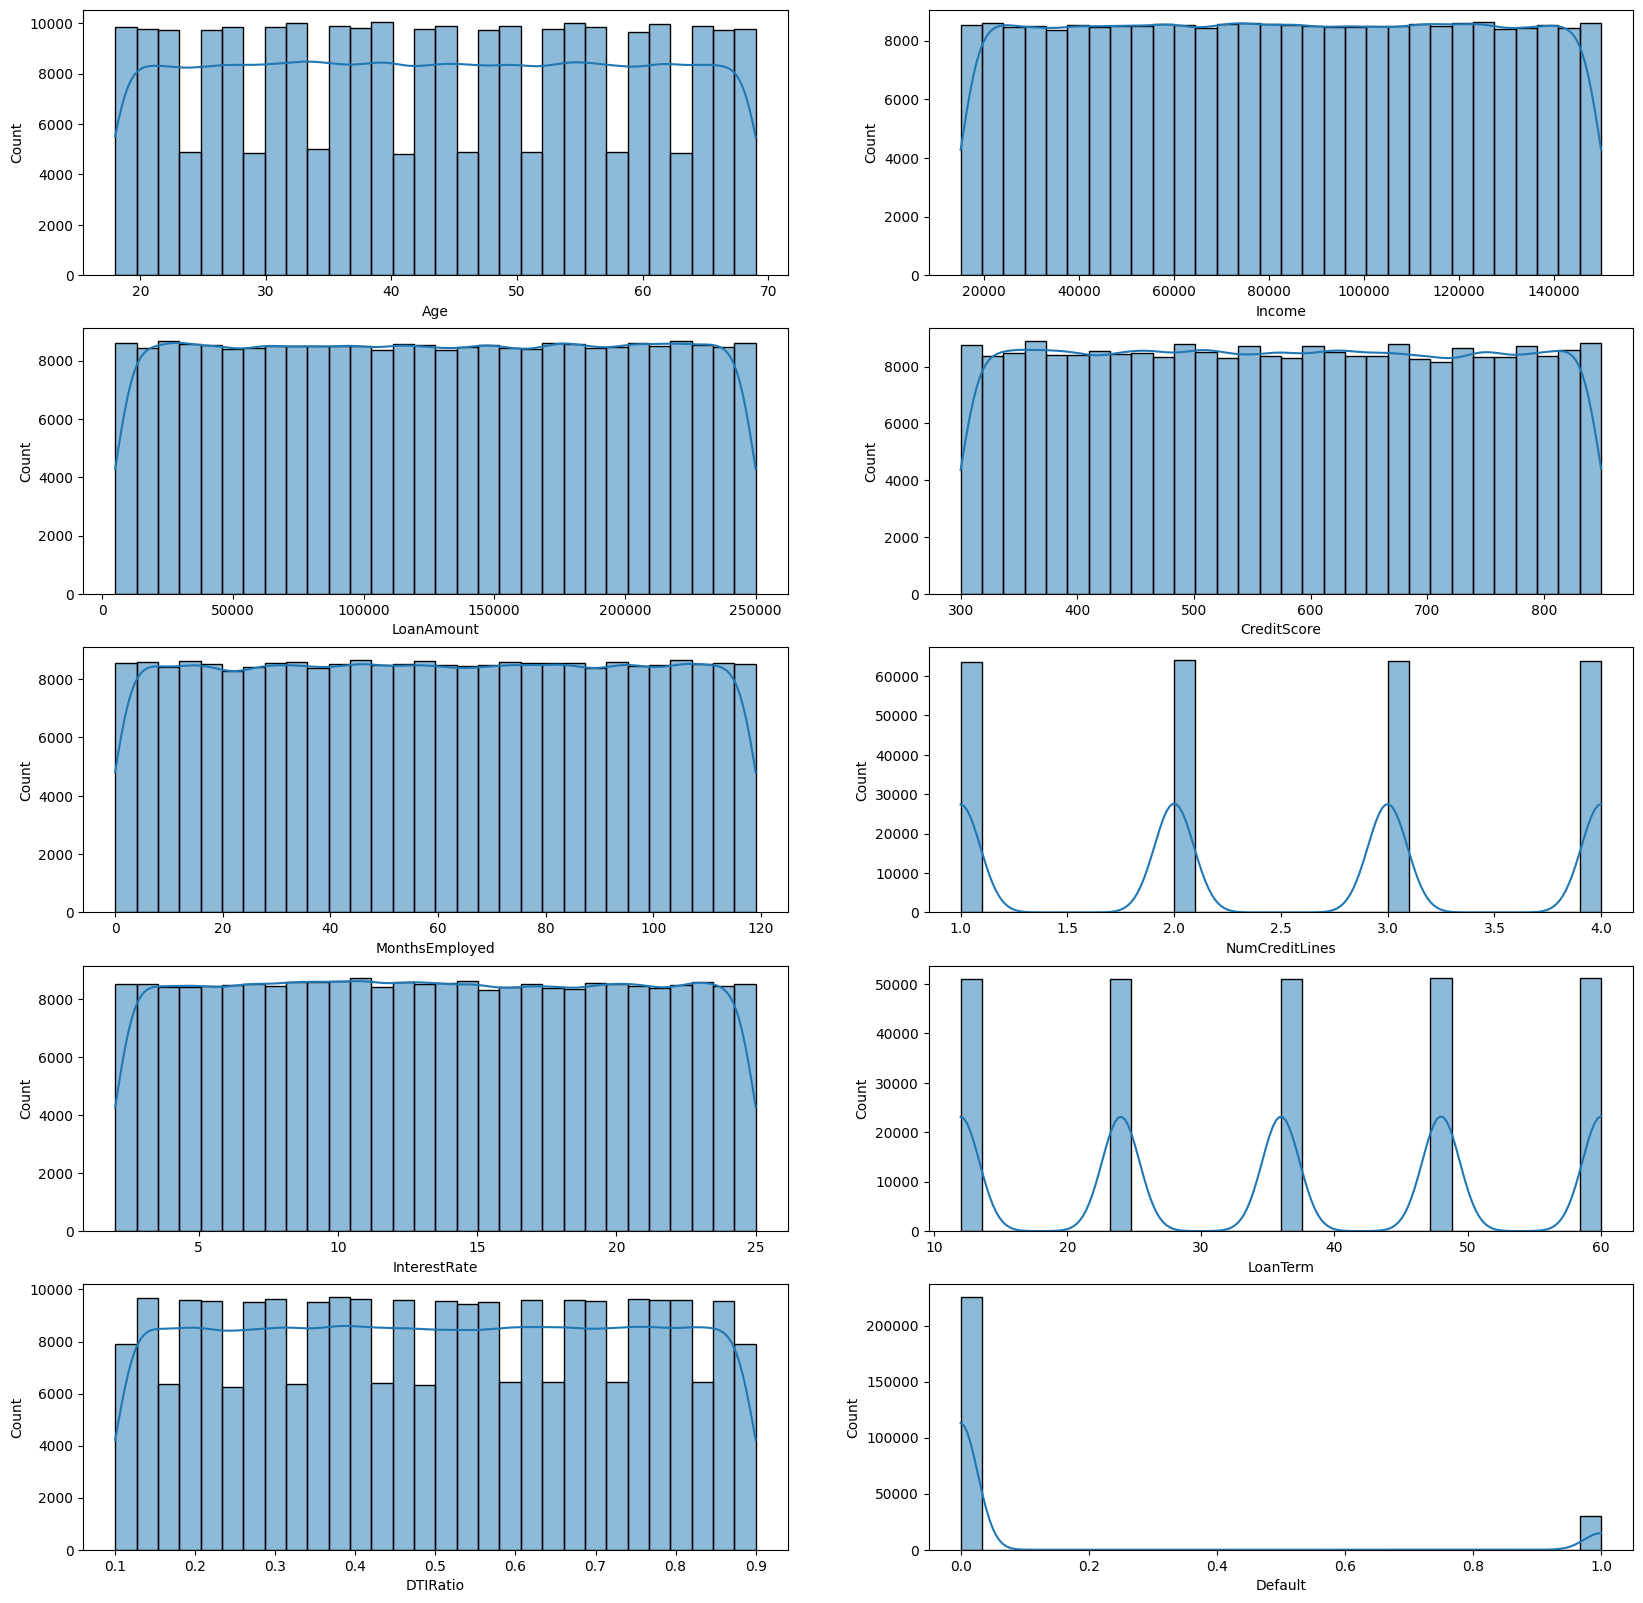

In [13]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))
ax = ax.flatten()

for index, column_name in enumerate(numerical_data):
    sns.histplot(data[column_name], ax=ax[index], bins=30, kde=True)

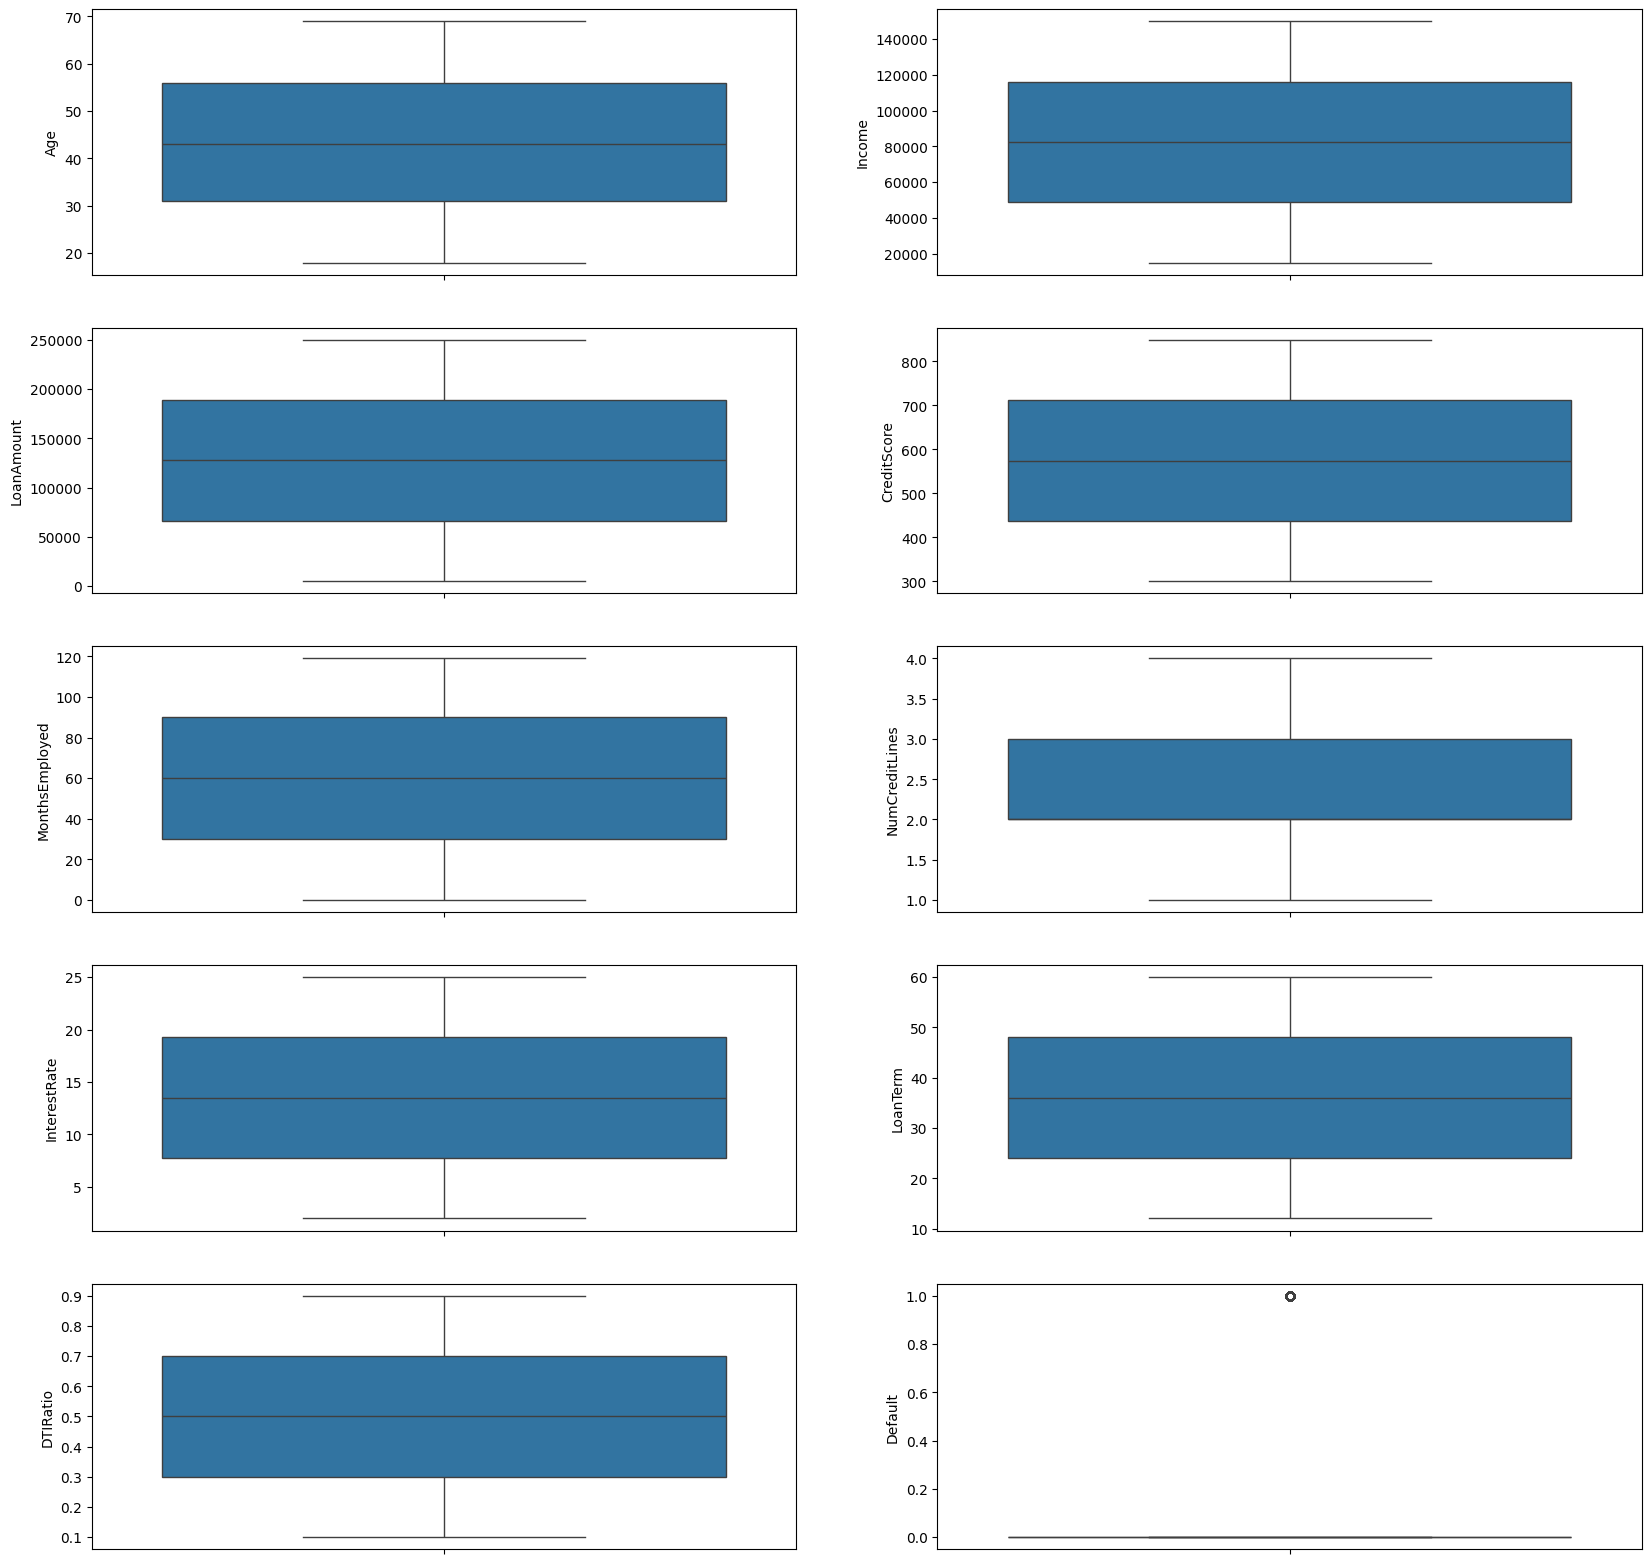

In [14]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))
ax = ax.flatten()

for index, column_name in enumerate(numerical_data):
    sns.boxplot(data[column_name], ax=ax[index])

# Bivariate Analysis

<Axes: >

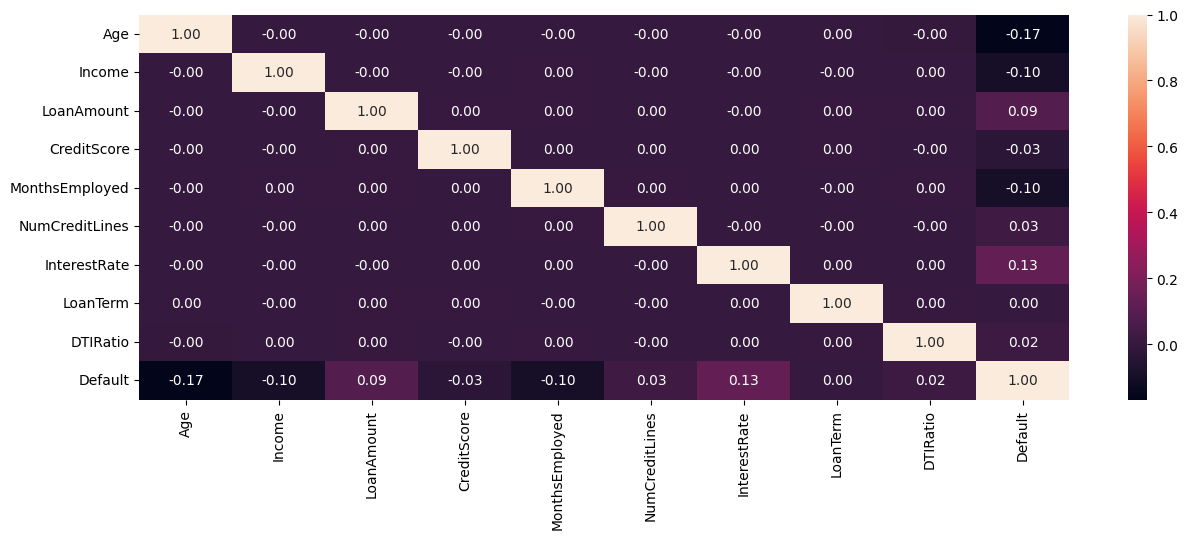

In [15]:
plt.figure(figsize=(15, 5))
numerical_data.corr()
sns.heatmap(numerical_data.corr(), annot=True, fmt='.2f' )

# Data Preprocessing

In [16]:
data.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [17]:
features = data.drop("Default", axis=1)

In [18]:
features.head(2)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes


In [19]:
label = data["Default"]

In [20]:
label.head(2)

0    0
1    0
Name: Default, dtype: int64

# Encoding Categorical Variables

In [21]:
features.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No


In [22]:
categorical_data = features.select_dtypes(include="object")

In [23]:
categorical_data.head()

,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,Master's,Full-time,Married,No,No,Other,Yes
2,Master's,Unemployed,Divorced,Yes,Yes,Auto,No
3,High School,Full-time,Married,No,No,Business,No
4,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No


In [24]:
# !pip install scikit-learn

In [25]:
!pip install scikit-learn

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
# 1. create object of the encoder

encoder = LabelEncoder()

In [28]:
# 2. fit (learning)
encoder.fit(data['Education'])

LabelEncoder()

In [29]:
encoder.transform(data['Education'])

array([0, 2, 2, ..., 1, 1, 0], shape=(255347,))

In [30]:
categorical_data.head(3)

,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,Master's,Full-time,Married,No,No,Other,Yes
2,Master's,Unemployed,Divorced,Yes,Yes,Auto,No


In [31]:
categorical_data.tail(3)

,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
255344,High School,Self-employed,Married,Yes,Yes,Auto,Yes
255345,High School,Part-time,Single,Yes,Yes,Other,No
255346,Bachelor's,Unemployed,Divorced,Yes,No,Education,Yes


In [32]:
features.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No


In [33]:
for column_name in categorical_data:
    features[column_name] = encoder.fit_transform(features[column_name])

In [34]:
features.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0
3,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0


In [35]:
for column_name in categorical_data:
    print(column_name)

Education
EmploymentType
MaritalStatus
HasMortgage
HasDependents
LoanPurpose
HasCoSigner


### Data Splitting

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
# features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.2, random_state=42)

In [38]:
Xtrain, Xtest, ytrain, ytest = train_test_split(features, label, test_size=0.2)

In [39]:
Xtrain

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
89541,57,57484,238814,668,22,1,14.26,60,0.13,0,1,0,0,0,2,1
108918,34,133354,80832,806,111,1,12.09,48,0.87,3,2,0,0,0,2,1
12453,60,81319,91326,374,28,1,22.28,24,0.83,2,0,0,0,0,0,0
161264,51,149466,244530,355,5,2,10.64,12,0.18,3,2,2,1,1,0,1
191727,53,15837,242379,432,39,3,12.80,60,0.32,0,1,1,0,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131518,38,102187,43863,821,6,4,16.36,12,0.65,2,2,1,0,1,0,0
206564,47,16117,91706,397,82,3,12.43,60,0.31,1,2,2,1,0,3,0
240475,26,34386,139439,822,11,2,2.69,36,0.72,2,3,1,1,1,2,1
84554,34,41354,183623,631,36,1,9.41,24,0.88,3,2,0,0,0,3,0


In [40]:
# Adding random_state=42 helps for reproducibility of the randomness
Xtrain, Xtest, ytrain, ytest = train_test_split(features, label, test_size=0.2, random_state=42)

In [41]:
Xtrain

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
137187,18,137576,209136,846,26,2,10.47,60,0.81,1,2,2,1,0,1,0
230334,47,57194,5970,748,30,2,19.72,36,0.73,1,3,0,0,1,2,0
19687,26,84328,95065,453,7,2,24.25,12,0.45,2,2,1,0,0,4,1
106509,53,49795,229582,533,107,3,14.44,60,0.17,0,2,2,1,0,0,1
242291,49,115450,22072,840,0,4,24.48,12,0.11,0,1,2,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,40,116623,161673,651,79,2,23.44,12,0.87,0,1,0,0,0,3,1
103694,67,62958,189499,460,77,3,9.29,36,0.11,0,2,2,0,0,1,1
131932,62,34372,59645,524,94,3,9.72,60,0.24,3,0,2,1,0,0,0
146867,44,146262,198454,489,7,4,4.31,48,0.30,1,2,1,1,0,3,0


### Model Training

In [42]:
# Linear model

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
# Step 1: Initialize the model
model = LogisticRegression(random_state=42)

In [45]:
# Step 2: Train model
model.fit(Xtrain, ytrain)

C:\Users\iheom\.conda\envs\MachineLearning\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [46]:
# Step 3: Model predictions
predictions = model.predict(Xtest) 

### Model Evaluation

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
report = classification_report(ytest, predictions)
matrix = confusion_matrix(ytest, predictions)

In [49]:
print(report)

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     45170
           1       0.83      0.00      0.00      5900

    accuracy                           0.88     51070
   macro avg       0.86      0.50      0.47     51070
weighted avg       0.88      0.88      0.83     51070



In [50]:
len(ytest)

51070

In [51]:
ytest.value_counts(normalize=True) * 100

Default
0    88.447229
1    11.552771
Name: proportion, dtype: float64

In [52]:
matrix

array([[45169,     1],
       [ 5895,     5]])

<Axes: >

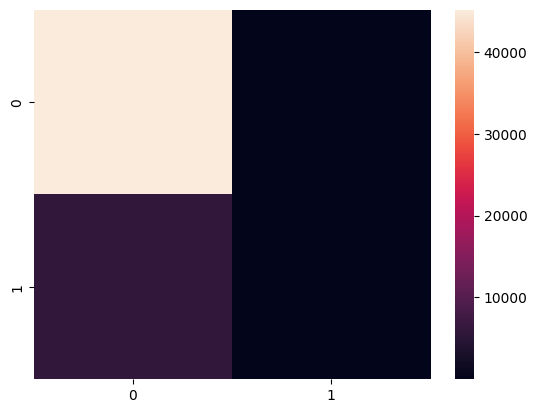

In [53]:
sns.heatmap(matrix)

<Axes: >

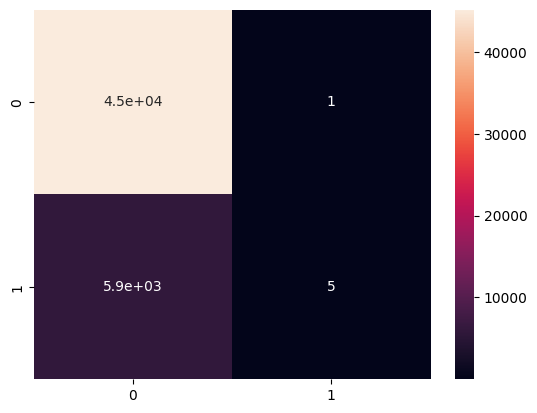

In [54]:
sns.heatmap(matrix, annot=True)

<Axes: >

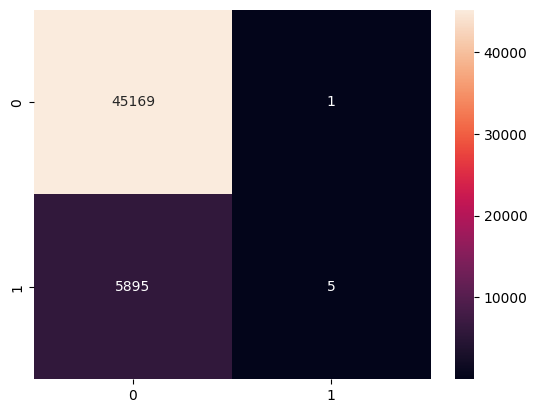

In [55]:
sns.heatmap(matrix, annot=True, fmt="g")

In [56]:
# Model can be improved from the data side or model side

### Data Scalling

### - For uniform distribution ==> MinMaxScaler
### - For normal or slightly skewed distribution ==> StandardScaler 
### - For heavily skewed distribution ==> RobustScaler 

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
scaler = MinMaxScaler()

In [59]:
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.fit_transform(Xtest)

              precision    recall  f1-score   support

           0    0.88739   0.99754   0.93925     45170
           1    0.62116   0.03085   0.05878      5900

    accuracy                        0.88586     51070
   macro avg    0.75428   0.51420   0.49901     51070
weighted avg    0.85663   0.88586   0.83753     51070



<Axes: >

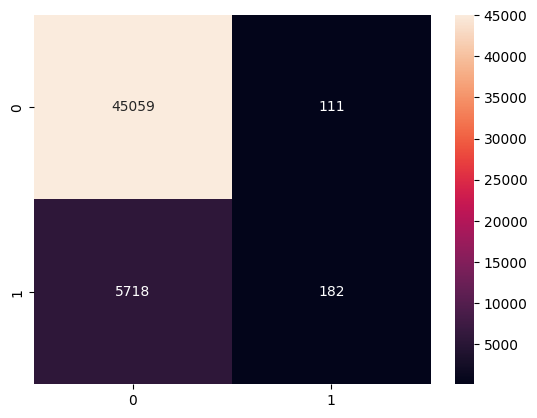

In [60]:
model = LogisticRegression(random_state=42)
model.fit(Xtrain_scaled, ytrain)
predictions = model.predict(Xtest_scaled) 
report = classification_report(ytest, predictions, digits=5)
matrix = confusion_matrix(ytest, predictions)
print(report)
sns.heatmap(matrix, annot=True, fmt='g')

In [61]:
# Further improvement on the model using parameter tuning e.g using class_weight(0:1, 1:2) etc

              precision    recall  f1-score   support

           0    0.92053   0.87366   0.89648     45170
           1    0.30402   0.42254   0.35362      5900

    accuracy                        0.82154     51070
   macro avg    0.61228   0.64810   0.62505     51070
weighted avg    0.84930   0.82154   0.83376     51070



<Axes: >

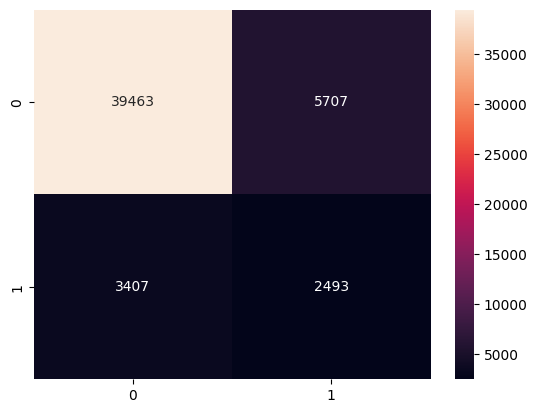

In [62]:
model = LogisticRegression(random_state=42, class_weight={0:1, 1:4})

model.fit(Xtrain_scaled, ytrain)
predictions = model.predict(Xtest_scaled)
report = classification_report(ytest, predictions, digits=5)
matrix = confusion_matrix(ytest, predictions)
print(report)
sns.heatmap(matrix, annot=True, fmt='g')

### Feature Importance for Logistic Regression

In [63]:
# Trying Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

              precision    recall  f1-score   support

           0    0.92053   0.87366   0.89648     45170
           1    0.30402   0.42254   0.35362      5900

    accuracy                        0.82154     51070
   macro avg    0.61228   0.64810   0.62505     51070
weighted avg    0.84930   0.82154   0.83376     51070



<Axes: >

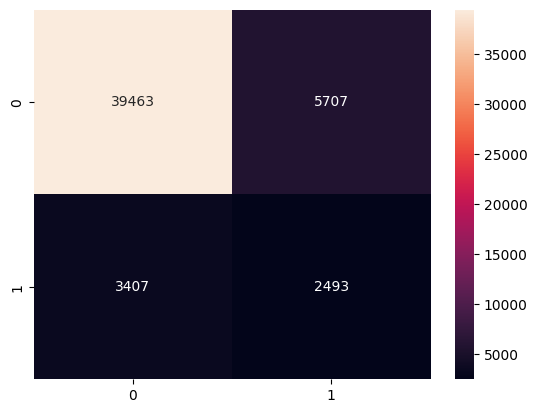

In [65]:
model = LogisticRegression(random_state=42, class_weight={0:1, 1:4})

model.fit(Xtrain_scaled, ytrain)
predictions = model.predict(Xtest_scaled)
report = classification_report(ytest, predictions, digits=5)
matrix = confusion_matrix(ytest, predictions)
print(report)
sns.heatmap(matrix, annot=True, fmt='g')

In [66]:
Xtrain.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
137187,18,137576,209136,846,26,2,10.47,60,0.81,1,2,2,1,0,1,0
230334,47,57194,5970,748,30,2,19.72,36,0.73,1,3,0,0,1,2,0
19687,26,84328,95065,453,7,2,24.25,12,0.45,2,2,1,0,0,4,1
106509,53,49795,229582,533,107,3,14.44,60,0.17,0,2,2,1,0,0,1
242291,49,115450,22072,840,0,4,24.48,12,0.11,0,1,2,0,1,2,1


<Axes: xlabel='Importances', ylabel='Features'>

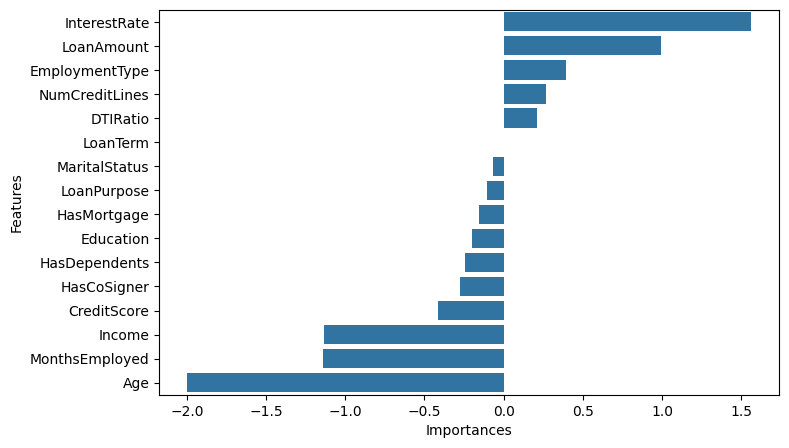

In [67]:
feat_cols = Xtrain.columns
feat_import = pd.DataFrame({"Features": feat_cols, "Importances": model.coef_[0]})
feat_import = feat_import.sort_values(by="Importances", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x="Importances", y="Features", data=feat_import)

              precision    recall  f1-score   support

           0    0.88749   0.99763   0.93934     45170
           1    0.63605   0.03169   0.06038      5900

    accuracy                        0.88604     51070
   macro avg    0.76177   0.51466   0.49986     51070
weighted avg    0.85844   0.88604   0.83780     51070



<Axes: >

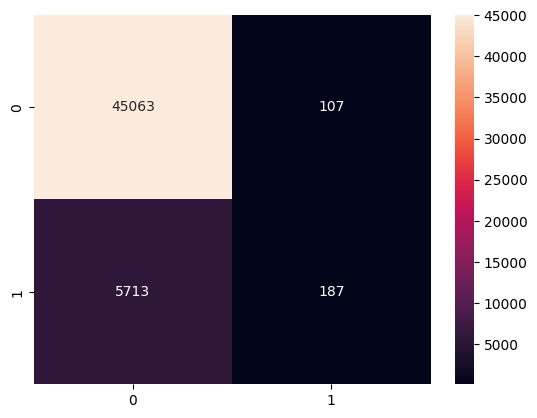

In [68]:
model = RandomForestClassifier(random_state=42, class_weight={0:1, 1:4})

model.fit(Xtrain_scaled, ytrain)
predictions = model.predict(Xtest_scaled)
report = classification_report(ytest, predictions, digits=5)
matrix = confusion_matrix(ytest, predictions)
print(report)
sns.heatmap(matrix, annot=True, fmt='g')

In [69]:
model.feature_importances_

array([0.12346932, 0.13011049, 0.11530581, 0.09621592, 0.10052636,
       0.0294051 , 0.13167643, 0.03562807, 0.08444316, 0.02935622,
       0.0285231 , 0.02304097, 0.01337598, 0.01225826, 0.035622  ,
       0.0110428 ])

In [70]:
feat_cols = Xtrain.columns

In [71]:
feat_cols

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education',
       'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents',
       'LoanPurpose', 'HasCoSigner'],
      dtype='object')

In [72]:
feat_import = pd.DataFrame({"Features": feat_cols, "Importances": model.feature_importances_})

In [73]:
feat_import

,Features,Importances
0,Age,0.123469
1,Income,0.130110
2,LoanAmount,0.115306
3,CreditScore,0.096216
4,MonthsEmployed,0.100526
5,NumCreditLines,0.029405
6,InterestRate,0.131676
7,LoanTerm,0.035628
8,DTIRatio,0.084443
9,Education,0.029356


In [74]:
feat_import = feat_import.sort_values(by="Importances", ascending=False)

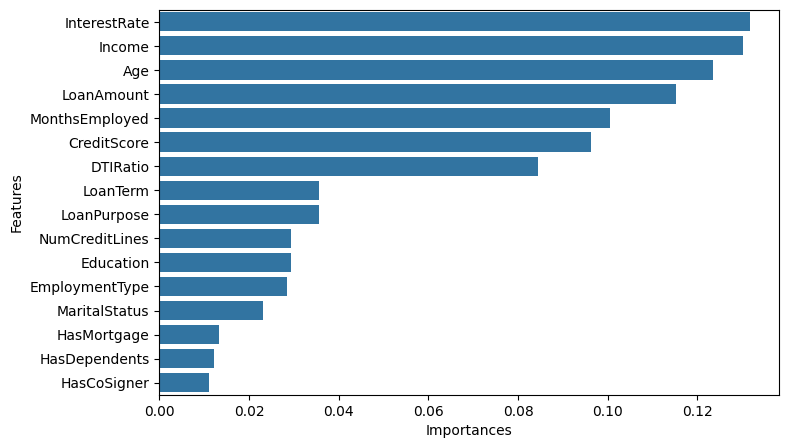

In [75]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Importances", y="Features", data=feat_import)
plt.show()

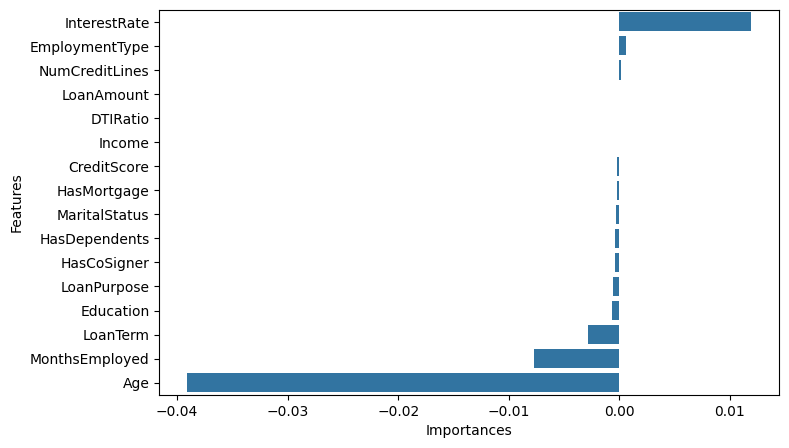

In [77]:
feat_cols = Xtrain.columns
feat_import = pd.DataFrame({"Features": feat_cols, "Importances": lr_model.coef_[0]})
feat_import = feat_import.sort_values(by="Importances", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x="Importances", y="Features", data=feat_import)
plt.show()